<a href="https://colab.research.google.com/github/ish66726-a11y/Quant-Finance-Fundamentals/blob/main/notebooks/10Vasicek%E3%83%A2%E3%83%87%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#10 Vasicekモデル

#10-1 金利モデル（Interest Rate Modeling）の導入

## なぜ金利をモデル化する必要があるのか？

金利は確率的（stochastic）に変動するため、
将来の金利パスを決定論的に予測することはできない。

企業の借入コストに直結する
企業は融資を受けると **変動金利** に左右される。

- 金利上昇 → 支払利息が増加 → 財務悪化  
→ 金利リスクを管理する必要がある（例：金利スワップ）

これまでの債券価格式では、
金利 $r$ が一定であると仮定していた。
しかし実際には金利は時間とともに変動する。


債券は金利の逆数で現在価値を計算するため：

- **ゼロクーポン債**  
  $$
  P = \frac{F}{(1+r)^N}
  $$

- **クーポン債**  
   $$P = \sum_{t=1}^N \frac{C}{(1+r)^t} + \frac{X}{(1+r)^N}$$

金利が変動すると **債券価格も大きく動く**。

---

## 株価モデルとの違い

株価モデル（幾何ブラウン運動, GBM）は、長期的に「右肩上がり」を仮定している。

しかし、 金利は上がり続けたりしない。

むしろ、金利は一定の水準へ戻る性質を持つ。これを扱う代表的な確率過程が

**オーンシュタイン＝ウーレンベック過程（OU過程）** 短期金利 $r_t$ を確率過程として表すと、


$$
dr_t = \theta(\mu - r_t)dt + \sigma dW_t
$$

- 現在の金利が平均 μ から離れていれば  
  → 平均へ戻る方向に動く（θ が強さ）
- σ はランダム変動

金利モデルでは **GBM ではなく OU 過程をベース** にする。

---
## まとめ

- 金利は企業、債券、金融工学モデルすべてに影響  
- 金利は **平均回帰性** を持つため、株式モデル（GBM）は不適
- 代わりに **Ornstein–Uhlenbeck（OU）過程** の方が適している




#10-2 Ornstein–Uhlenbeck 過程の理論背景

## 基礎となる Wiener 過程
OU 過程の「ランダム部分」は **Wiener 過程**（ブラウン運動）によって構成される。

 独立増分：
$$
W_{t+\Delta t} - W_t
$$
は、過去の値に依存しない。  

Wiener過程は独立増分を持つため、
マルコフ過程の一例である。


ガウス分布に従う：
$$
W_{t+\Delta t} - W_t \sim \mathcal{N}(0,\;\Delta t)
$$

- 平均：0  
- 分散：Δt  

→ **正規乱数** を使えば簡単にシミュレーションできる。

---

## OU 過程（Ornstein–Uhlenbeck Process）

金利や為替、ペアトレードなどで用いられる **平均回帰型の確率過程**。

 確率微分方程式（SDE）

$$
dX_t = \theta(\mu - X_t)dt + \sigma\, dW_t
$$



- $\mu$：平均（平衡点, long-term mean）
- $\theta$：平均へ戻る強さ（speed of reversion）
- $\sigma$：ランダム変動の大きさ（volatility）
- $dW_t$：Wiener 過程の微小変動（正規分布）

####**OU過程の明示解**

確率微分方程式

$$
dX_t = \theta(\mu - X_t)dt + \sigma dW_t
$$

の解は次の形で与えられる：

$$
X_t
=
\mu + (X_0 - \mu)e^{-\theta t}
+
\sigma \int_0^t e^{-\theta (t-s)} dW_s
$$

この式から分かるように、

- $(X_0 - \mu)e^{-\theta t}$ の項は時間とともに指数的に減衰する  
- したがって、$X_t$ の平均は長期的に $\mu$ に収束する  

つまり、OU過程は **平均回帰性（Mean reversion）** を持つ。


---
## OU過程の特徴

#### **平均回帰性（Mean Reversion）**
OU過程では、現在値 $X_t$ が平均 $\mu$ から離れるほど、
ドリフト項 $\theta(\mu - X_t)$ が平均方向へ引き戻す。

- $X_t > \mu$ のとき → 下方向へ引き戻す
- $X_t < \mu$ のとき → 上方向へ引き戻す

これは株価モデル（GBM）とは本質的に異なる点である。

#### **定常性（Stationarity）**
OU過程は長期的に定常分布へ収束する。

具体的には、

$$
X_t \xrightarrow[t \to \infty]{} \mathcal{N}
\left(
\mu,\;
\frac{\sigma^2}{2\theta}
\right)
$$

となり、平均は $\mu$、分散は $\frac{\sigma^2}{2\theta}$ に安定する。


---

## ペアトレード（Pairs Trading）との関係

ペアトレードの考え方

相関の強い2銘柄（例：トヨタ vs ホンダ）を組み合わせると、**スプレッドがOU型の平均回帰過程で近似できる**ことが多い。


つまり：

- 平均から大きく外れたら → **平均に戻るはず**  
- よって「売り／買い」で仕掛けられる  
  - 平均より高い → 売り  
  - 平均より低い → 買い  
- 市場全体の動きに影響されにくく **マーケットニュートラル戦略** になる

OU 過程は「平均に戻る」という性質を数学的に表現し、多くのクオンツ戦略の基礎となる。

---

## まとめ

- OU 過程は **平均へ戻る動きを持つ確率過程**
- ランダム部分（$dW_t$）は **正規分布の Wiener 過程**
- 金利モデル（例：Vasicek）やペアトレードの基礎
- パラメータ θ, μ, σ がプロセスの性質を決める



#10-3 Ornstein–Uhlenbeck（OU）過程のシミュレーション実装
## OU 過程の離散近似

連続時間の OU 過程：

$$
dX_t = \theta(\mu - X_t)dt + \sigma dW_t
$$

Euler–Maruyama 法による離散化：

$$
X_{t+\Delta t}
=
X_t + \theta(\mu - X_t)\Delta t
+ \sigma \sqrt{\Delta t}\,Z_t
$$

ここで：

- $ Z_t \sim \mathcal{N}(0,1) $
- $ dW_t = \sqrt{\Delta t}\,Z_t $

---

## Python実装例：OU過程




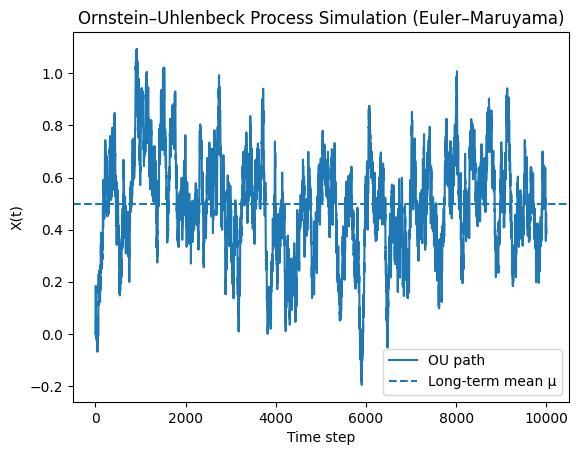

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def generate_process(
    dt=0.01,
    theta=1.2,
    mu=0.5,
    sigma=0.3,
    n_steps=10000
):
    """
    Ornstein–Uhlenbeck (OU) 過程を
    Euler–Maruyama 法で離散近似して生成する関数
    """
    # 初期値 X(0) = 0 とする
    x = np.zeros(n_steps)

    for t in range(1, n_steps):
        # Wiener過程の増分 dW ~ N(0, Δt)
        dW = np.random.normal(0, np.sqrt(dt))

        # OU過程の離散近似式（Euler–Maruyama）
        # X_{t+Δt} = X_t + θ(μ - X_t)Δt + σ dW
        x[t] = (
            x[t-1]
            + theta * (mu - x[t-1]) * dt   # 平均回帰ドリフト項
            + sigma * dW                   # ランダムノイズ項
        )

    return x


# 実行部分（関数の外に出す）
# 乱数を固定
np.random.seed(42)

# パラメータ
dt = 0.01
theta = 1.2
mu = 0.5
sigma = 0.3
n_steps = 10000

# シミュレーション実行
data = generate_process(
    dt=dt,
    theta=theta,
    mu=mu,
    sigma=sigma,
    n_steps=n_steps
)

# 結果を可視化
plt.plot(data, label="OU path")

# 理論平均 μ を水平線で表示（平均回帰を視覚化）
plt.axhline(y=mu, linestyle="--", label="Long-term mean μ")
plt.legend()

plt.xlabel("Time step")
plt.ylabel("X(t)")
plt.title("Ornstein–Uhlenbeck Process Simulation (Euler–Maruyama)")
plt.show()


##  パラメータを変える例

1. 平均を変更する（μ = 0.9、揺れを小さく）

```python
data = generate_process(mu=0.9, sigma=0.05)
```

→ 平均 0.9 に強く引き寄せられ、小さく上下する。

2. ランダム性を強くする（σ = 1.0）

```python
data = generate_process(mu=0.5, sigma=1.0)
```

→ 平均は同じだが、上下の振れ幅が激しくなる。

---

## まとめ

- OU 過程は **平均回帰（mean reversion）** を持つ確率過程
- シミュレーションには **Euler–Maruyama 法** が使われる
- ノイズ項は Wiener 過程：  
  $$
  dW_t = \sqrt{\Delta t}\,Z_t,\quad Z_t \sim \mathcal{N}(0,1)
  $$
- θ が大きい → 強く平均へ戻る  
- σ が大きい → ランダムな揺れが増える
- 金利モデル（Vasicek）、ペアトレードのスプレッドなどで必須


#10-4 Vasicek モデル（短金利モデル）の理論まとめ

## Vasicek モデルとは？

- 1977 年に提案された **短金利（short rate）モデル**
- 金利 $ r_t $ の時間変化を **平均回帰（mean reversion）** をもつ確率過程で記述する
- **債券価格・デリバティブ価格・モーゲージモデル** に利用される
- 政策金利や景気など多くの要因が絡むため、金利モデリングは本質的に難しい  
  → しかし Vasicek は **最もシンプルで強力** なモデルのひとつ

---

## 確率微分方程式
$$
dr_t = \kappa(\theta - r_t)\,dt + \sigma\, dW_t
$$


- $ r_t $ ： 短金利（short rate）
- $ \kappa $ ： 平均回帰速度（speed of mean reversion）
- $ \theta $ ： 金利の長期平均（long-term mean）
- $ \sigma $ ： ボラティリティ（変動性）
- $ dW_t $ ： Wiener（ブラウン運動）過程の微小変化

---

## 各項の解釈

 ① 決定論的項（mean reversion）
$$
\kappa(\theta - r_t)\,dt
$$

- 金利が平均 $ \theta$ に戻る力
- $\kappa$ が大きいほど、急速に平均へ吸収される
- 金利が高すぎれば 下に引っ張られ、低すぎれば 上に戻される


 ② 確率（ノイズ）項
$$
\sigma\, dW_t
$$

- ランダム変動（市場ショック、景気ニュースなど）
- $dW_t = \sqrt{dt}\,Z_t,\quad Z_t \sim \mathcal{N}(0,1)$
 → 正規分布で揺れる

---

## Vasicek モデルの特徴

 長所
- 数学的に扱いやすい（解析解が存在）
- 計算が速く、債券価格式も closed-form
- 金利の平均回帰を自然に表現できる

 注意点
- **金利が負になる可能性がある**  
  → 近年は実際にマイナス金利が存在したため問題は小さい場合もある
- 実務では Hull–White モデル（拡張版）がよく使われる

---

## Vasicek は OU 過程そのもの

OU 過程の一般式：

$$
dX_t = \theta(\mu - X_t)\, dt + \sigma dW_t
$$

金利を $ X_t = r_t $ とすれば、**Vasicek = OU 過程の金利バージョン**である。そのため、金利モデルを理解するには OU 過程の理解が不可欠である。



# 10-5 Vasicekモデルを使った債券価格の算出  

## ゼロクーポン債の基本（一定金利の場合）

額面を $X$、満期を $T$ とすると、  
金利 $r$ が一定である場合の現在価値は

$$
P(0,T) = X e^{-rT}
$$

例：  
- 額面 $X = 1000$
- 金利 $r = 0.10$
- 満期 $T = 2$

$$
P(0,2) = 1000 e^{-0.1 \times 2}
$$

これは「金利が一定」という仮定の下での単純な割引現在価値である。

---

## 金利が確率的に変動する場合の債券価格

実際には金利は確率的に変動する。

債券価格は、**リスク中立測度（risk-neutral measure）**  
$\mathbb{Q}$ のもとでの期待値として表される：

$$
P(0,T)
=
\mathbb{E}^{\mathbb{Q}}
\left[
e^{-\int_0^T r_t\, dt}
\right]
$$

ここで：

- $r_t$ は短期金利（short rate）
- 積分は金利の時間パスに依存する
- $\mathbb{E}^{\mathbb{Q}}$ はリスク中立測度での期待値

---

## Vasicekモデルの場合

Vasicekモデルでは短期金利は

$$
dr_t = \kappa(\theta - r_t)\,dt + \sigma dW_t
$$

に従う。

このモデルでは、ゼロクーポン債価格は  
指数アフィン型（exponential-affine form）の解析解を持つ：

$$
P(0,T) = A(T)\, e^{-B(T) r_0}
$$

ここで：

- $A(T)$ と $B(T)$ は解析的に求まる関数
- $r_0$ は現在の短期金利

したがって、Vasicekモデルでは債券価格は closed-form で計算可能である。

---

## なぜ Monte Carlo 法を使うのか？

Vasicekモデル自体は解析解を持つが、

- Hull–Whiteモデル
- CIRモデルの拡張形
- 多因子モデル

など、より現実的な金利モデルでは  
解析解が存在しない場合が多い。

そのため、**Monte Carlo 法による数値評価**が重要となる。

---

## Monte Carlo 法による債券価格の考え方

1. Vasicek SDE を用いて金利パスを多数生成する  
   - $r_t^{(1)}, r_t^{(2)}, \dots , r_t^{(N)}$

2. 各パスで割引因子を計算する：

$$
D^{(i)}
=
e^{-\int_0^T r_t^{(i)} dt}
$$

3. その平均を取る：

$$
P(0,T)
=
X \cdot
\frac{1}{N}
\sum_{i=1}^{N}
D^{(i)}
$$

シミュレーション回数 $N$ を増やすことで推定精度は向上する。

---

## まとめ

- 債券価格はリスク中立測度下での割引因子の期待値
- Vasicekモデルでは closed-form 解が存在
- 一般モデルでは Monte Carlo 法が必要
- 数値的手法は金利デリバティブ評価にも応用可能


# 10-6 Vasicek モデルによる債券価格の Monte Carlo 評価

## 概要と目的

本章では、**Vasicek モデル**を用いて短金利を記述し、将来の金利パスを多数生成することで、**ゼロクーポン債の価格を Monte Carlo 法により評価**する。

具体的には以下を行う：

- Vasicek モデルで短金利プロセスを表現  
- 将来の金利パスを多数生成  
- 割引因子の期待値からゼロクーポン債価格を算出  

---
## 理論式（短金利モデルによる債券価格）

短金利モデルにおけるゼロクーポン債価格は、次で定義される：

$$
P(0,T)
=
X \cdot \mathbb{E}^{\mathbb{Q}}\left[
\exp\left(
-\int_0^T r_t \, dt
\right)
\right]
$$


ここで：

- $X$：額面  
- $r_t$：短金利（Vasicek モデル）  
- $T$：満期  

この式は、「将来にわたる短金利の累積（割引率の面積）」を用いて、現在価値を評価していることを意味する。

金利の積分は、シミュレーションでは連続時間のまま扱えないため、時間刻み $\Delta t$ を用いた数値積分（リーマン和）で近似する：

$$
\int_0^T r_t \, dt
\;\approx\;
\sum_{i=0}^{N-1} r_i \, \Delta t
$$
※ $\Delta t$ を十分小さくすることで近似精度は向上する。

ここで $r_i$ は時刻 $t_i = i\Delta t$ における短金利であり、区間 $[0, T]$ を $N$ 個に分割したときの近似である。




---

## Monte Carlo アルゴリズム

債券価格を Monte Carlo 法で評価する手順は以下の通りである：

1. Vasicek モデルを用いて金利パスを多数生成  
2. 各金利パスについて  
   $$
   I = \sum r_i \, \Delta t
   $$
   を計算  
3. 割引因子  
   $$
   e^{-I}
   $$
   を算出  
4. 全シミュレーションの平均を取り、債券価格を得る：

$$
P(0,T) = X \cdot \text{mean}\left(e^{-I}\right)
$$

---

## Python実装例：Vasicek モデルによる債券価格の Monte Carlo 評価


債券価格 (Monte Carlo): 945.98円


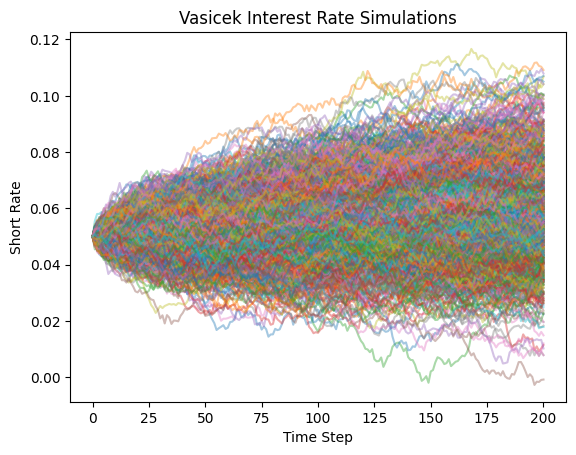

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# シミュレーション設定
# ----------------------------
N_simulations = 1000   # 金利パス数
N_points = 200         # 時間分割数


def vasicek_monte_carlo(r0, kappa, theta, sigma, T=1.0):
    """
    Vasicek モデルによる短金利パス生成

    r0    : 初期金利
    kappa : 平均回帰速度
    theta : 長期平均
    sigma : ボラティリティ
    T     : 満期（年）
    """
    dt = T / N_points
    rates = np.zeros((N_simulations, N_points + 1))
    rates[:, 0] = r0

    for t in range(N_points):
        dW = np.random.normal(0, np.sqrt(dt), N_simulations)

        rates[:, t+1] = (
            rates[:, t]
            + kappa * (theta - rates[:, t]) * dt
            + sigma * dW
        )

    return rates


# ----------------------------
# 実行部分（関数の外に出す）
# ----------------------------

# 乱数を固定
np.random.seed(42)

# パラメータ
X = 1000
r0 = 0.05
kappa = 0.3
theta = 0.09
sigma = 0.02
T = 1.0

# ----------------------------
# 金利パス生成
# ----------------------------
rates = vasicek_monte_carlo(r0, kappa, theta, sigma, T)

# ----------------------------
# 割引因子の計算
# ∫ r_t dt ≈ Σ r_t Δt
# ----------------------------
dt = T / N_points
integral_sum = np.sum(rates[:, :-1], axis=1) * dt

discount_factors = np.exp(-integral_sum)

# Monte Carlo 推定
bond_price = X * np.mean(discount_factors)

print(f"債券価格 (Monte Carlo): {bond_price:,.2f}円")

# ----------------------------
# 金利パスの可視化
# ----------------------------
plt.plot(rates.T, alpha=0.4)
plt.title("Vasicek Interest Rate Simulations")
plt.xlabel("Time Step")
plt.ylabel("Short Rate")
plt.show()


## 計算結果の例（Monte Carlo）

Monte Carlo シミュレーションの結果から、短金利モデルと債券価格の関係が直感的に確認できる。

- 初期金利が高い  
  → 割引が強くなる  
  → **債券価格は低下する**

- 初期金利が低い  
  → 割引が弱くなる  
  → **債券価格は上昇する**

以下は、Vasicek モデルのパラメータを変更したときの  
ゼロクーポン債価格（シミュレーション例）である：

| 初期金利 $r_0$ | 長期平均 $\theta$ | 債券価格 |
|------------------|---------------------|------------|
| 0.10             | 0.09                | 約 570円   |
| 0.01             | 0.03                | 約 880円   |

この結果から、短金利の水準が債券価格に直接的な影響を与えることが分かる。

---
## 計算結果の解釈

Monte Carlo シミュレーションの結果から、次のような性質が確認できる：

- 初期金利が高い  
  → 割引が強くなり、**債券価格は低下**する  

- 長期平均金利が高い  
  → 将来の金利水準が高くなり、**債券価格は低下**する  

このように、短金利モデルのパラメータは債券価格に直接影響を与える。

---

## まとめ

- Vasicek モデルは **OU 過程ベースの短金利モデル**である  
- Monte Carlo 法により、割引因子の期待値を直接数値評価できる  
- 本手法は **CIR モデルや Hull–White モデル**など、他の金利モデルにも容易に拡張可能である  
